In [23]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [75]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
X = df.drop(columns=['Outcome']).values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [77]:
y = df['Outcome'].values
y[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [78]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# convert to tensor : X should be float since torch using floating point arithmetic
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype= torch.long)

In [80]:
X_train.shape, y_train.shape

(torch.Size([614, 8]), torch.Size([614]))

In [157]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 2) #for binary classification change this to 1 and loss function to BCELoss
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [158]:
model = ANN()

In [159]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [160]:
epochs = 500 + 1
losses = []

for i in range(epochs):
    # predict
    y_pred = model(X_train) 
    # calculate loss
    l = loss(y_pred, y_train)
    # zero the gradients
    optimizer.zero_grad()
    # backpropagation
    l.backward()
    # update weights
    optimizer.step()
    losses.append(l.item())

    if i % 100 == 0:
        print(f'Epoch {i}, Loss: {l.item()}')


Epoch 0, Loss: 1.769453525543213
Epoch 100, Loss: 0.8926519751548767
Epoch 200, Loss: 0.6771971583366394
Epoch 300, Loss: 0.611937403678894
Epoch 400, Loss: 0.5994990468025208
Epoch 500, Loss: 0.5908123850822449


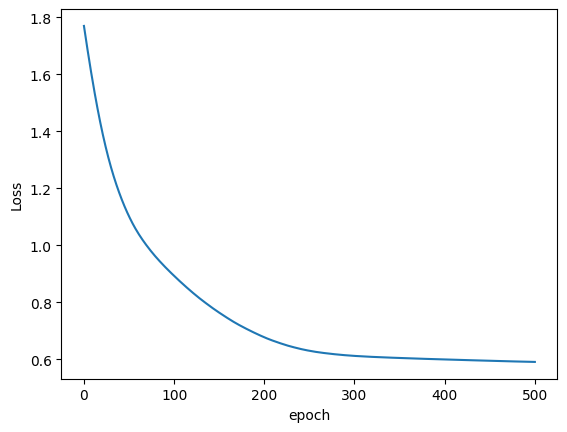

In [161]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [162]:
# evaluate the model
with torch.no_grad():
    y_pred = model(X_test) # gives output as (n_samples, 2)
    # I want idx of the maximum value along dimension 1
    predicted_class = torch.argmax(y_pred, dim=1)
    correctly_classified = (predicted_class == y_test).sum().item()
    accuracy = correctly_classified / len(y_test)
    print(f'Accuracy: {accuracy}')


Accuracy: 0.6948051948051948


In [164]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_class)
cm

array([[78, 21],
       [26, 29]], dtype=int64)